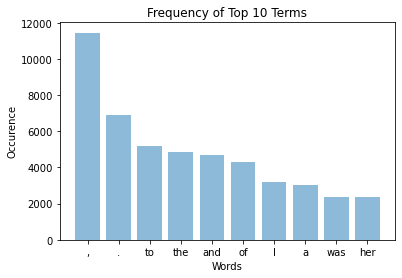

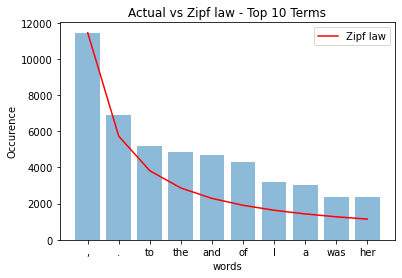

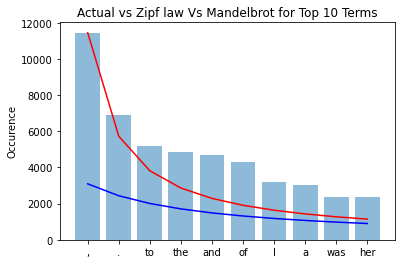

In [1]:
#Import required libraries
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

#Download emma corpus
frequency={}
words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

#Frequency count of words in corpus
for word in words_emma:
    count = frequency.get(word,0)
    frequency[word] = count+1
    
#Store the result in pandas dataframe
rank=1
column_header = ['Word','Rank','Frequency','Rank*Frequency']
df = pd.DataFrame(columns=column_header)

for word,freq in reversed(sorted(frequency.items(),key=itemgetter(1))):
    df.loc[word]=[word,rank,freq,rank*freq]
    rank = rank+1

#Subset the pandas dataframe to top 10 words
df2 = df.head(10)

words = []
freq = []
for d in df2.index.values:
    words.append(d)
for d in df2["Frequency"].values:
    freq.append(d)

 # plot the data
y_pos = np.arange(len(words))
plt.bar(y_pos, freq, align='center', alpha=0.5)
plt.xticks(y_pos, words)
plt.ylabel('Occurence')
plt.xlabel('Words')
plt.title('Frequency of Top 10 Terms')
plt.show()

# Zipf's law
freqrank = []
for r in range(1,11,1):
    max = 11454
    freqrank.append(max/r)

#Pandas dataframe for Zipf's law implementation
df3 = pd.DataFrame({'words' : words, 'Zipf law' : freqrank})

# zipf law plot the data
df3.plot(kind='line', x='words',y='Zipf law',color='red')
#Bar chart for the vocabulary
y_pos = np.arange(len(words))
plt.bar(y_pos, freq, align='center', alpha=0.5)
plt.xticks(y_pos, words)
plt.ylabel('Occurence')
plt.title('Actual vs Zipf law - Top 10 Terms')
plt.show()

# Mandelbrot approximation
freqm = []
for r in range(1,11,1):
    max = 11454
    freqm.append(max/(r+2.7))

#Pandas dataframe for mandelbrot
df4 = pd.DataFrame({'words' : words, 'Mandelbrot' : freqm})

# Mandelbrot approximation plot the data
plt.plot('words','Mandelbrot',data=df4, color='blue')
plt.plot('words','Zipf law',data=df3, color='red')
y_pos = np.arange(len(words))
plt.bar(y_pos, freq, align='center', alpha=0.5)
plt.xticks(y_pos, words)
plt.ylabel('Occurence')
plt.title('Actual vs Zipf law Vs Mandelbrot for Top 10 Terms')
plt.show()